In [750]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from fractions import Fraction

import plotly.express as px

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

%matplotlib inline

In [751]:
#this is a custom function to open each dataset
def open_fuel_year(fuel_year):
    
    df = pd.read_csv('./clean_'+str(fuel_year)+'.csv', low_memory=False)
    
    return df

In [752]:
clean_df = pd.DataFrame()

years = [2008,2018]

#join the datasets
for fuel_year in years:
    clean_df = pd.concat([clean_df, open_fuel_year(fuel_year)])
    
    print(len(clean_df))
clean_df.reset_index(drop=True, inplace=True)

2207
3890


In [753]:
clean_df

,Unnamed: 0,record_year,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,0,2008,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,15.0,20.0,17.0,4,no
1,1,2008,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,FA,SUV,6.0,15.0,20.0,17.0,4,no
2,2,2008,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,22.0,19.0,5,no
3,3,2008,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,FA,SUV,6.0,17.0,22.0,19.0,5,no
4,4,2008,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,CA,midsize car,7.0,16.0,24.0,19.0,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,1678,2018,VOLVO S90,2.0,40,SemiAuto-8,4WD,Electricity,FA,midsize car,7.0,70.0,72.0,71.0,10,Elite
3886,1679,2018,VOLVO XC 60,2.0,40,SemiAuto-8,4WD,Electricity,CA,small SUV,7.0,60.0,58.0,59.0,10,Elite
3887,1680,2018,VOLVO XC 60,2.0,40,SemiAuto-8,4WD,Electricity,FA,small SUV,7.0,60.0,58.0,59.0,10,Elite
3888,1681,2018,VOLVO XC 90,2.0,40,SemiAuto-8,4WD,Electricity,CA,standard SUV,7.0,63.0,61.0,62.0,10,Elite


In [754]:
clean_df.drop(columns='Unnamed: 0', inplace=True)

In [755]:
clean_df

,record_year,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,2008,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,15.0,20.0,17.0,4,no
1,2008,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,FA,SUV,6.0,15.0,20.0,17.0,4,no
2,2008,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,22.0,19.0,5,no
3,2008,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,FA,SUV,6.0,17.0,22.0,19.0,5,no
4,2008,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,CA,midsize car,7.0,16.0,24.0,19.0,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,2018,VOLVO S90,2.0,40,SemiAuto-8,4WD,Electricity,FA,midsize car,7.0,70.0,72.0,71.0,10,Elite
3886,2018,VOLVO XC 60,2.0,40,SemiAuto-8,4WD,Electricity,CA,small SUV,7.0,60.0,58.0,59.0,10,Elite
3887,2018,VOLVO XC 60,2.0,40,SemiAuto-8,4WD,Electricity,FA,small SUV,7.0,60.0,58.0,59.0,10,Elite
3888,2018,VOLVO XC 90,2.0,40,SemiAuto-8,4WD,Electricity,CA,standard SUV,7.0,63.0,61.0,62.0,10,Elite


In [756]:
#clean_df.smartway.astype('str').lower()

In [757]:
v08 = clean_df.query('record_year == 2008')
v18 = clean_df.query('record_year == 2018')

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [758]:
v08.fuel.value_counts()

Gasoline    2067
ethanol       66
gas           65
diesel         7
CNG            2
Name: fuel, dtype: int64

In [759]:
v18.fuel.value_counts()

Gasoline       1511
Ethanol          55
Gas              55
Diesel           38
Electricity      24
Name: fuel, dtype: int64

In [760]:
# how many unique models used alternative sources of fuel in 2008
alt_08 = v08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

33

In [761]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = v18.query('fuel in ["Electricity", "Gas"]').model.nunique()
alt_18

28

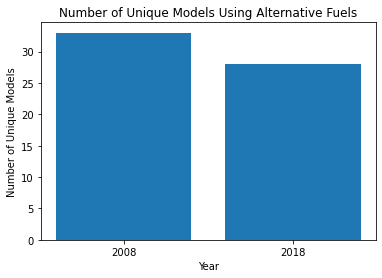

In [762]:
plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

In [763]:
# total unique models each year
total_08 = v08.model.nunique()
total_18 = v18.model.nunique()
total_08, total_18

(411, 366)

In [764]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.08029197080291971, 0.07650273224043716)

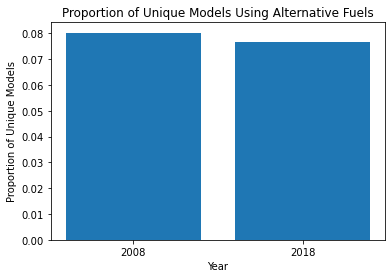

In [765]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

### Q2: How much have vehicle classes improved in fuel economy?  

In [766]:
veh_08 = v08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              17.920807
large car        18.323308
midsize car      21.395604
minivan          18.666667
pickup           16.060837
small car        21.054896
station wagon    22.349593
van              14.206897
Name: cmb_mpg, dtype: float64

In [767]:
veh_18 = v18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.372881
midsize car        27.849462
minivan            20.800000
pickup             18.589744
small SUV          23.986364
small car          25.388889
special purpose    18.666667
standard SUV       18.197674
station wagon      27.434783
Name: cmb_mpg, dtype: float64

In [768]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          5.049573
midsize car        6.453858
minivan            2.133333
pickup             2.528907
small SUV               NaN
small car          4.333993
special purpose         NaN
standard SUV            NaN
station wagon      5.085189
van                     NaN
Name: cmb_mpg, dtype: float64

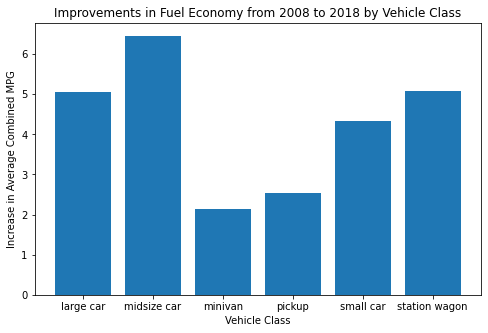

In [769]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

We can analyze this by filtering each dataframe by SmartWay classification and exploring these datasets.

In [770]:
# smartway labels for 2008
v08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [771]:
v18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [772]:
# get all smartway vehicles in 2008
smart_08 = v08.query('smartway == "yes"')

In [773]:
# get all smartway vehicles in 2018
smart_18 = v18.query('smartway in ["Yes", "Elite"]')

In [774]:
smart_18

,record_year,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
2240,2018,AUDI A4 Ultra,2.0,40,AMS-7,2WD,Gasoline,CA,small car,3.0,27.0,37.0,31.0,7,Yes
2241,2018,AUDI A4 Ultra,2.0,40,AMS-7,2WD,Gasoline,FA,small car,3.0,27.0,37.0,31.0,7,Yes
2450,2018,BUICK Encore,1.4,40,SemiAuto-6,2WD,Gasoline,CA,small SUV,3.0,27.0,33.0,30.0,7,Yes
2451,2018,BUICK Encore,1.4,40,SemiAuto-6,2WD,Gasoline,FA,small SUV,3.0,27.0,33.0,30.0,7,Yes
2546,2018,CHEVROLET Cruze,1.4,40,Man-6,2WD,Gasoline,CA,small car,6.0,27.0,40.0,32.0,7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,2018,VOLVO S90,2.0,40,SemiAuto-8,4WD,Electricity,FA,midsize car,7.0,70.0,72.0,71.0,10,Elite
3886,2018,VOLVO XC 60,2.0,40,SemiAuto-8,4WD,Electricity,CA,small SUV,7.0,60.0,58.0,59.0,10,Elite
3887,2018,VOLVO XC 60,2.0,40,SemiAuto-8,4WD,Electricity,FA,small SUV,7.0,60.0,58.0,59.0,10,Elite
3888,2018,VOLVO XC 90,2.0,40,SemiAuto-8,4WD,Electricity,CA,standard SUV,7.0,63.0,61.0,62.0,10,Elite


In [775]:
# explore smartway vehicles in 2008
smart_08.describe()

,record_year,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,625.0,625.000000,625.000000,625.00000,625.00000,625.000000,625.000000,625.000000
mean,2008.0,2.492320,4.664000,6.99680,21.45760,28.880000,24.201600,7.027200
std,0.0,0.584993,0.934935,1.14459,3.49751,3.091552,3.086519,0.803176
min,2008.0,1.300000,4.000000,6.00000,17.00000,22.000000,20.000000,6.000000
25%,2008.0,2.000000,4.000000,6.00000,20.00000,27.000000,22.000000,6.000000
50%,2008.0,2.400000,4.000000,7.00000,21.00000,29.000000,24.000000,7.000000
75%,2008.0,2.700000,6.000000,7.00000,23.00000,31.000000,25.000000,7.000000
max,2008.0,5.000000,8.000000,9.50000,48.00000,45.000000,46.000000,10.000000


In [776]:
# explore smartway vehicles in 2008
smart_18.describe()

,record_year,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,216.0,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,2018.0,1.787963,39.351852,5.194444,34.907407,41.472222,37.361111,7.925926
std,0.0,0.407081,4.153597,1.780819,16.393724,13.064746,14.813858,1.194590
min,2018.0,1.200000,30.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,2018.0,1.500000,40.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,2018.0,1.700000,40.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2018.0,2.000000,40.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,2018.0,3.500000,60.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q4: What features are associated with better fuel economy?

You can explore trends between cmb_mpg and the other features in this dataset, or filter this dataset like in the previous question and explore the properties of that dataset. For example, you can select all vehicles that have the top 50% fuel economy ratings like this.

In [777]:
top_08 = v08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,record_year,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,1048.0,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,2008.0,2.663931,4.887405,6.557252,20.249046,27.547710,22.921756,6.615458
std,0.0,0.674432,1.034604,1.102253,3.172229,3.069027,2.919418,0.810644
min,2008.0,1.300000,4.000000,1.000000,17.000000,20.000000,20.000000,4.000000
25%,2008.0,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2008.0,2.500000,4.000000,6.000000,20.000000,27.000000,22.000000,6.000000
75%,2008.0,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,2008.0,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [778]:
top_18 = v18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,record_year,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,765.0,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,2018.0,2.060131,41.647059,4.683660,26.592157,34.384314,29.504575,6.141176
std,0.0,0.483597,6.722307,1.864327,10.437721,8.663051,9.590519,1.384636
min,2018.0,1.200000,30.000000,1.000000,20.000000,27.000000,24.000000,4.000000
25%,2018.0,1.800000,40.000000,3.000000,22.000000,30.000000,25.000000,5.000000
50%,2018.0,2.000000,40.000000,5.000000,24.000000,32.000000,27.000000,6.000000
75%,2018.0,2.000000,40.000000,7.000000,27.000000,36.000000,30.000000,7.000000
max,2018.0,3.600000,60.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q5: For all the models produced in 2008 that are still in production in 2018, how much has the mpg improved and which vehicle has improved the most?

Take a list of all models being produeced in 2008 and filter it into a list. Compare the list to vehicles being produced in 2018

In [779]:
v08.model.unique()

array(['ACURA MDX', 'ACURA RDX', 'ACURA RL', 'ACURA TL', 'ACURA TSX',
       'ASTON MARTIN DB9', 'ASTON MARTIN DB9 Volante',
       'ASTON MARTIN V8 Vantage', 'AUDI A3', 'AUDI A4', 'AUDI A4 Avant',
       'AUDI A4 Cabriolet', 'AUDI A6', 'AUDI A6 Avant', 'AUDI A8',
       'AUDI A8 L', 'AUDI Q7', 'AUDI R8', 'AUDI RS4',
       'AUDI RS4 Cabriolet', 'AUDI S4', 'AUDI S4 Avant',
       'AUDI S4 Cabriolet', 'AUDI S5', 'AUDI S6', 'AUDI S8',
       'AUDI TT Coupe', 'AUDI TT Roadster', 'BENTLEY Arnage',
       'BENTLEY Azure', 'BENTLEY Continental Flying Spur',
       'BENTLEY Continental GT', 'BENTLEY Continental GTC', 'BMW 328ci',
       'BMW 328ci Convertible', 'BMW 328cxi', 'BMW 328i',
       'BMW 328i Sport Wagon', 'BMW 328xi', 'BMW 328xi Sport Wagon',
       'BMW 335ci', 'BMW 335ci Convertible', 'BMW 335cxi', 'BMW 335i',
       'BMW 335xi', 'BMW 528i', 'BMW 528xi', 'BMW 535i', 'BMW 535xi',
       'BMW 535xi Sport Wagon', 'BMW 550i', 'BMW 650ci',
       'BMW 650ci Convertible', 'BMW 750i', 

In [780]:
#for x in v08.columns:
#    v08.rename(lambda x: x[:10] + "_2008", axis="columns", inplace=True)

In [781]:
v08.rename(columns=lambda x: x[:10] + "_2008", inplace=True)

In [782]:
v08

,record_yea_2008,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,cert_regio_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,2008,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,15.0,20.0,17.0,4,no
1,2008,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,FA,SUV,6.0,15.0,20.0,17.0,4,no
2,2008,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,22.0,19.0,5,no
3,2008,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,FA,SUV,6.0,17.0,22.0,19.0,5,no
4,2008,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,CA,midsize car,7.0,16.0,24.0,19.0,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,2008,MITSUBISHI Raider,4.7,8,Auto-L5,4WD,gas,FA,pickup,3.0,14.0,19.0,15.0,3,no
2203,2008,NISSAN Armada,5.6,8,Auto-L5,2WD,gas,FA,SUV,6.0,12.0,18.0,14.0,2,no
2204,2008,NISSAN Armada,5.6,8,Auto-L5,4WD,gas,FA,SUV,6.0,12.0,17.0,14.0,2,no
2205,2008,NISSAN Titan,5.6,8,Auto-L5,2WD,gas,FA,pickup,6.0,12.0,17.0,14.0,2,no


In [673]:
v08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2207 entries, 0 to 2206
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model_2008_2008  2207 non-null   object 
 1   displ_2008_2008  2207 non-null   float64
 2   cyl_2008_2_2008  2207 non-null   int64  
 3   trans_2008_2008  2207 non-null   object 
 4   drive_2008_2008  2207 non-null   object 
 5   fuel_2008__2008  2207 non-null   object 
 6   cert_regio_2008  2207 non-null   object 
 7   veh_class__2008  2207 non-null   object 
 8   air_pollut_2008  2207 non-null   float64
 9   city_mpg_2_2008  2207 non-null   float64
 10  hwy_mpg_20_2008  2207 non-null   float64
 11  cmb_mpg_20_2008  2207 non-null   float64
 12  greenhouse_2008  2207 non-null   int64  
 13  smartway_2_2008  2207 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 258.6+ KB


In [748]:
combinedset = v08.merge(
    v18,
    left_on='model_2008',
    right_on='model',
    how="inner",
)

In [783]:
combinedset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6242 entries, 0 to 6241
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model_2008            6242 non-null   object 
 1   displ_2008            6242 non-null   float64
 2   cyl_2008              6242 non-null   int64  
 3   trans_2008            6242 non-null   object 
 4   drive_2008            6242 non-null   object 
 5   fuel_2008             6242 non-null   object 
 6   cert_regio_2008       6242 non-null   object 
 7   veh_class_2008        6242 non-null   object 
 8   air_pollut_2008       6242 non-null   float64
 9   city_mpg_2008         6242 non-null   float64
 10  hwy_mpg_2008          6242 non-null   float64
 11  cmb_mpg_2008          6242 non-null   float64
 12  greenhouse_2008       6242 non-null   int64  
 13  smartway_2008         6242 non-null   object 
 14  model                 6242 non-null   object 
 15  displ                

In [749]:
combinedset.head(15)

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,cert_regio_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,22.0,19.0,5,no,ACURA RDX,3.5,60,SemiAuto-6,2WD,Gasoline,FA,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,22.0,19.0,5,no,ACURA RDX,3.5,60,SemiAuto-6,2WD,Gasoline,CA,small SUV,3.0,20.0,28.0,23.0,5,No
2,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,22.0,19.0,5,no,ACURA RDX,3.5,60,SemiAuto-6,4WD,Gasoline,FA,small SUV,3.0,19.0,27.0,22.0,4,No
3,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,22.0,19.0,5,no,ACURA RDX,3.5,60,SemiAuto-6,4WD,Gasoline,CA,small SUV,3.0,19.0,27.0,22.0,4,No
4,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,FA,SUV,6.0,17.0,22.0,19.0,5,no,ACURA RDX,3.5,60,SemiAuto-6,2WD,Gasoline,FA,small SUV,3.0,20.0,28.0,23.0,5,No
5,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,FA,SUV,6.0,17.0,22.0,19.0,5,no,ACURA RDX,3.5,60,SemiAuto-6,2WD,Gasoline,CA,small SUV,3.0,20.0,28.0,23.0,5,No
6,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,FA,SUV,6.0,17.0,22.0,19.0,5,no,ACURA RDX,3.5,60,SemiAuto-6,4WD,Gasoline,FA,small SUV,3.0,19.0,27.0,22.0,4,No
7,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,FA,SUV,6.0,17.0,22.0,19.0,5,no,ACURA RDX,3.5,60,SemiAuto-6,4WD,Gasoline,CA,small SUV,3.0,19.0,27.0,22.0,4,No
8,AUDI A3,2.0,4,Man-6,2WD,Gasoline,CA,station wagon,7.0,21.0,29.0,24.0,7,yes,AUDI A3,2.0,40,AMS-6,4WD,Gasoline,CA,small car,7.0,24.0,31.0,27.0,6,No
9,AUDI A3,2.0,4,Man-6,2WD,Gasoline,CA,station wagon,7.0,21.0,29.0,24.0,7,yes,AUDI A3,2.0,40,AMS-6,4WD,Gasoline,FA,small car,7.0,24.0,31.0,27.0,6,No


In [744]:
combinedset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6242 entries, 0 to 6241
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model_2008            6242 non-null   object 
 1   displ_2008            6242 non-null   float64
 2   cyl_2008              6242 non-null   int64  
 3   trans_2008            6242 non-null   object 
 4   drive_2008            6242 non-null   object 
 5   fuel_2008             6242 non-null   object 
 6   cert_regio_2008       6242 non-null   object 
 7   veh_class_2008        6242 non-null   object 
 8   air_pollut_2008       6242 non-null   float64
 9   city_mpg_2008         6242 non-null   float64
 10  hwy_mpg_2008          6242 non-null   float64
 11  cmb_mpg_2008          6242 non-null   float64
 12  greenhouse_2008       6242 non-null   int64  
 13  smartway_2008         6242 non-null   object 
 14  displ                 6242 non-null   float64
 15  cyl                  

In [745]:
combinedset.duplicated().value_counts()

False    6242
dtype: int64

In [788]:
#Create a new dataframe, model_mpg, that contain the mean combined mpg values in 2008 and 2018 for each unique model
#To do this, group by model and find the mean cmb_mpg_2008 and mean cmb_mpg for each.
model_mpg = combinedset.groupby('model')[['cmb_mpg_2008', 'cmb_mpg']].mean()

In [789]:
model_mpg

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000
...,...,...
TOYOTA Yaris,31.500000,32.500000
VOLKSWAGEN Jetta,24.166667,30.000000
VOLKSWAGEN Passat,21.250000,29.000000
